In [1]:
#loading all libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#reading the dataset and checking information
housing_dataset = pd.read_csv('housing_price.csv')
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
#converting date column from object to date
housing_dataset['date'] = pd.to_datetime(housing_dataset['date'])
#adding an year column to see all unique years
housing_dataset['year'] = housing_dataset['date'].dt.year


#number of observations per year.
housing_dataset['year'].value_counts()
#Calculating age of the house
housing_dataset['age'] = housing_dataset['year'] - housing_dataset['yr_built']

In [78]:
sum(housing_dataset['yr_renovated'] == 0)

20699

The initial intention was to calculate number of years since the houses were last renovated and store in a column called "last_renovated".  
Since most of the houses have never been renovated, hence I won't be using 'yr_renovated' column in model training.

In [4]:
housing_dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,43.317818
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,29.375493
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,-1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,18.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,40.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,63.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,115.000000


In [5]:
#scaling price of house to be in 1000$
housing_dataset['scaled_price'] = housing_dataset['price']/1000

Text(0, 0.5, 'Number of houses')

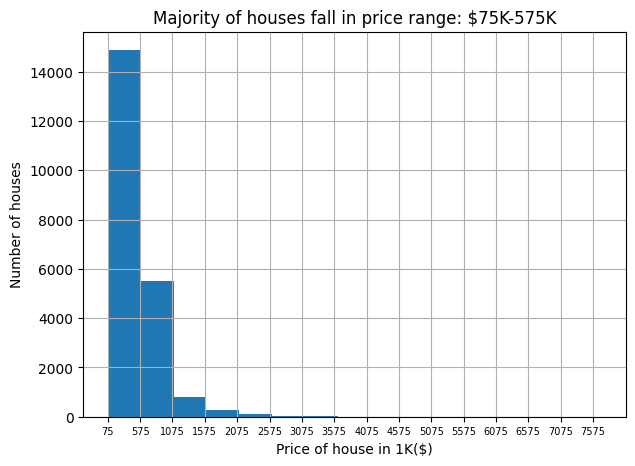

In [10]:
#Price of house
plt.figure(figsize = (7,5))
housing_dataset['scaled_price'].hist(bins = 15)
#to prevent displaying of price in scientific format
plt.ticklabel_format(style = 'plain')
plt.xticks(np.arange(min(housing_dataset['scaled_price']), max(housing_dataset['scaled_price']), 500), fontsize = 7)
plt.title("Majority of houses fall in price range: $75K-575K")
plt.xlabel("Price of house in 1K($)")
plt.ylabel("Number of houses")

Text(0, 0.5, 'Number of houses')

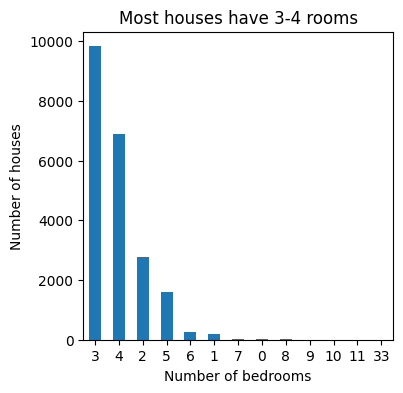

In [13]:
#Number of bedrooms
plt.figure(figsize = (4,4))
housing_dataset['bedrooms'].value_counts().plot(kind = "bar")
#the x-axis labels are being displayed at 90, correcting it.
plt.xticks(rotation = 360)
plt.title("Most houses have 3-4 rooms")
plt.xlabel("Number of bedrooms")
plt.ylabel("Number of houses")

In [44]:
#observations with number of rooms greater than 8
more_rooms = housing_dataset[housing_dataset['bedrooms'] > 10]
more_rooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age,scaled_price
8757,1773100755,2014-08-21 00:00:00+00:00,520000,11,3.00,3000,4960,2.0,0,0,...,1918,1999,98106,47.5560,-122.363,1420,4960,2014,96,520.0
15870,2402100895,2014-06-25 00:00:00+00:00,640000,33,1.75,1620,6000,1.0,0,0,...,1947,0,98103,47.6878,-122.331,1330,4700,2014,67,640.0


There are only 2 observations where number of rooms are greater than 10. Removing the observation where rooms are 33. It will skew the results. 

In [46]:
#removing observation with bedrooms = 33
housing_dataset.drop(housing_dataset[housing_dataset['bedrooms'] == 33].index, inplace = True)

Text(0, 0.5, 'Number of houses')

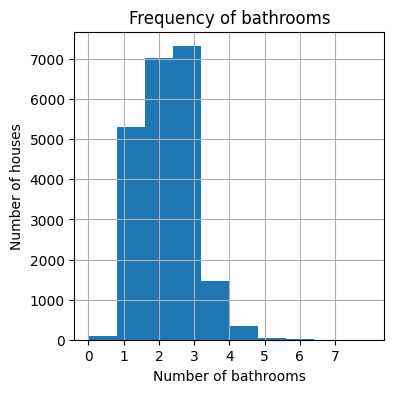

In [15]:
plt.figure(figsize = (4,4))
#Number of bathrooms
housing_dataset['bathrooms'].hist()
plt.xticks(np.arange(min(housing_dataset['bathrooms']), max(housing_dataset['bathrooms']),1))
plt.title("Most houses have 2-3 bathrooms")
plt.xlabel("Number of bathrooms")
plt.ylabel("Number of houses")

Text(0, 0.5, 'Number of houses')

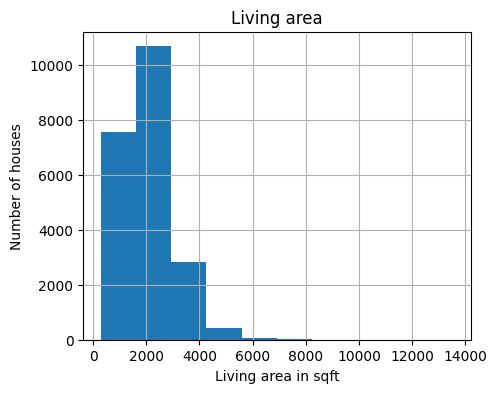

In [19]:
#Squareft. living area
plt.figure(figsize = (5,4))
housing_dataset['sqft_living'].hist()
plt.xticks(fontsize = 10)
plt.title("Living area")
plt.xlabel("Living area in sqft")
plt.ylabel("Number of houses")

In [51]:
housing_dataset[housing_dataset['sqft_lot'] > 1000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age,scaled_price
1719,1020069017,2015-03-27 00:00:00+00:00,700000,4,1.00,1300,1651359,1.0,0,3,...,1920,0,98022,47.2313,-122.023,2560,425581,2015,95,700.0
7647,2623069031,2014-05-21 00:00:00+00:00,542500,5,3.25,3010,1074218,1.5,0,0,...,1931,0,98027,47.4564,-122.004,2450,68825,2014,83,542.5
7769,2323089009,2015-01-19 00:00:00+00:00,855000,4,3.50,4030,1024068,2.0,0,0,...,2006,0,98045,47.4619,-121.744,1830,11700,2015,9,855.0
17319,3326079016,2015-05-04 00:00:00+00:00,190000,2,1.00,710,1164794,1.0,0,0,...,1915,0,98014,47.6888,-121.909,1680,16730,2015,100,190.0


Text(0, 0.5, 'Number of houses')

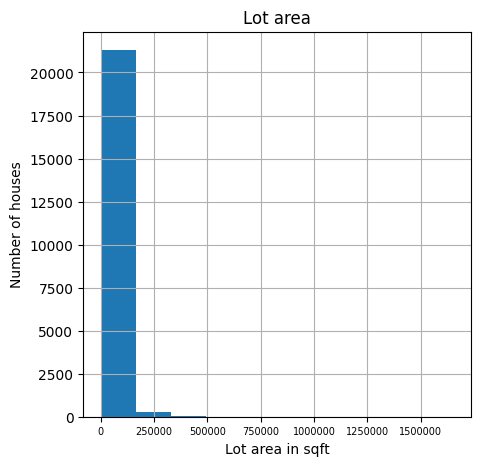

In [39]:
#Squareft. lot area
plt.figure(figsize = (5,5))
plt.ticklabel_format(style = 'plain')
housing_dataset['sqft_lot'].hist()
plt.xticks(fontsize = 7)
plt.title("Lot area")
plt.xlabel("Lot area in sqft")
plt.ylabel("Number of houses")


Text(0, 0.5, 'Number of houses')

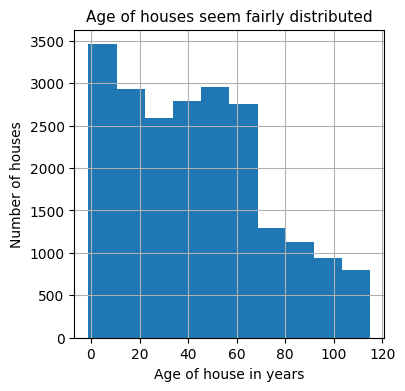

In [29]:
#Age of the house
plt.figure(figsize = (4,4))
housing_dataset['age'].hist()
plt.title("Age of houses seem fairly distributed", fontsize = 11)
plt.xlabel("Age of house in years")
plt.ylabel("Number of houses")


Text(0, 0.5, 'Number of houses')

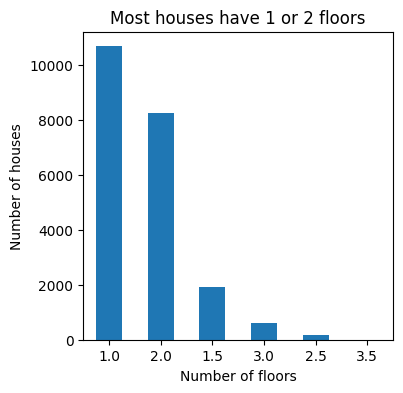

In [32]:

#Number of floors
plt.figure(figsize = (4,4))
housing_dataset['floors'].value_counts().plot(kind = "bar")
plt.xticks(rotation = 360)
plt.title("Most houses have 1 or 2 floors")
plt.xlabel("Number of floors")
plt.ylabel("Number of houses")

In [55]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             21612 non-null  int64              
 1   date           21612 non-null  datetime64[ns, UTC]
 2   price          21612 non-null  int64              
 3   bedrooms       21612 non-null  int64              
 4   bathrooms      21612 non-null  float64            
 5   sqft_living    21612 non-null  int64              
 6   sqft_lot       21612 non-null  int64              
 7   floors         21612 non-null  float64            
 8   waterfront     21612 non-null  int64              
 9   view           21612 non-null  int64              
 10  condition      21612 non-null  int64              
 11  grade          21612 non-null  int64              
 12  sqft_above     21612 non-null  int64              
 13  sqft_basement  21612 non-null  int64          

In [56]:
#setting the target outputs as labels
label = housing_dataset['price']

#removing all irrelevant columns
final_dataset = housing_dataset.drop(['id', 'date','price','yr_built','yr_renovated',
                                      'zipcode','lat','long','sqft_living15','sqft_lot15','year','scaled_price'], axis = 1)
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21612 non-null  int64  
 1   bathrooms      21612 non-null  float64
 2   sqft_living    21612 non-null  int64  
 3   sqft_lot       21612 non-null  int64  
 4   floors         21612 non-null  float64
 5   waterfront     21612 non-null  int64  
 6   view           21612 non-null  int64  
 7   condition      21612 non-null  int64  
 8   grade          21612 non-null  int64  
 9   sqft_above     21612 non-null  int64  
 10  sqft_basement  21612 non-null  int64  
 11  age            21612 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 2.1 MB
